In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
#%matplotlib notebook
%matplotlib inline

In [ ]:
x = np.linspace(-10,10,20)
y = np.linspace(-10,10,20)
z = np.linspace(-10,10,20)
xx,yy,zz = np.meshgrid(x,y,z,indexing='ij')
xxx,yyy = np.meshgrid(x,y,indexing='ij')

In [ ]:
q = 1.
v = 1.
c=3.
gamma = 4.
list_es=[]
for time1 in range(5):
    #calculate electric field
    common_denom = ((gamma*(xx-v*time1))**2 + yy**2 + zz**2)**1.5
    print common_denom.max(),common_denom.min()
    Ex = gamma*(xx-v*time1)/common_denom
    Ey = gamma*yy/common_denom
    Ez = gamma*zz/common_denom    
    E = np.array([Ex,Ey,Ez])
    #calculate magnetic field
    Bx = np.zeros_like(Ez)
    By = -v*Ez/c /c
    Bz = v*Ey/c /c
    B = np.array([Bx,By,Bz])
    
    list_es.append(E)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np


fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.25, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Z = ((R**2 - 1)**2)

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

plt.show()

In [ ]:
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Ex[0,:,:],Ex[:,0,:],Ex[:,:,0], cmap=plt.cm.YlGnBu_r)
plt.show()

In [ ]:
print X.shape,Y.shape,Z.shape,R.shape,P.shape

In [ ]:
"""
# Set limits and number of points in grid
y, x = np.mgrid[10:-10:100j, 10:-10:100j]

x_obstacle, y_obstacle = -5.0, 0.0
alpha_obstacle, a_obstacle, b_obstacle = 1.0, 1e3, 1e3

field = -alpha_obstacle * np.exp(-((x - x_obstacle)**2 / a_obstacle
                               + (y - y_obstacle)**2 / b_obstacle))

dy, dx = np.gradient(field, np.diff(y[:2, 0]), np.diff(x[0, :2]))
skip = (slice(None, None, 3), slice(None, None, 3))

fig, ax = plt.subplots()
im = ax.imshow(field, extent=[x.min(), x.max(), y.min(), y.max()])
#ax.quiver(x[skip], y[skip], dx[skip], dy[skip])

fig.colorbar(im)
ax.set(aspect=1, title='Quiver Plot')
plt.show()
"""

# Try to use coordinates z, r

In [ ]:
z = np.linspace(-10,10,20)
r = np.linspace(-10,10,20)
rr,zz = np.meshgrid(z,r,indexing='ij')

In [ ]:
#Define electric fields and magnetic fields
gamma=4.
v=1.
qover4pieps = 1.6*1e-19/(4*np.pi*8.85*1e-12)
list1=[]
for time1 in range(5):
    common_denom = ((gamma*(zz-v*time1))**2 + rr**2)**1.5
    Ez = qover4pieps*gamma*(zz-v*time1)/common_denom
    Er = np.sqrt(((qover4pieps*gamma*rr)**2)/common_denom)**0.5
        
    Bz = 0.
    Br = v/ (c**2) * Er
    
    list1.append([Ez,Er])

In [ ]:
fig = plt.figure(3)
fig.add_subplot(121)
plt.imshow(Er)
plt.title('Er')
plt.colorbar()
fig.add_subplot(122)
plt.imshow(Ez)
plt.title('Ez')
plt.colorbar()
plt.tight_layout()
plt.show()


In [ ]:
plt.subplot(511)
plt.imshow(list1[0][1])
plt.subplot(512)
plt.imshow(list1[1][1])
plt.subplot(513)
plt.imshow(list1[2][1])
plt.subplot(514)
plt.imshow(list1[3][1])
plt.subplot(515)
plt.imshow(list1[4][1])

plt.show()

# New scenario (x,y,z coords)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

/Users/gabrielfior/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [56]:
q=1.6*1e-19
vp = 0.99999725*3*1e8 #m/s
c = 3*1e8 #m/s
fourpiepsilon0 = 4*np.pi*8.85*1e-12
gamma = np.sqrt(1/(1 - (vp/c)**2))
print gamma
x_el = 0.
y_el = 1.e-2 #m
z_el=0.
z_proton=0.
vx_el = 0.
vy_el = 0.
vz_el = vp
m_el= 9.31*1e-31 #kg

426.401725859


In [57]:

deltat = 1.e-9
time1=0
count_iters = 0
list_pos=[]
list_vels=[]
list_proton=[]
list_acs=[]
list_es=[]
while time1<200*1e-9:
    #Calculate E - z propagation
    deltaz = z_proton - z_el
    com_den = (q/fourpiepsilon0)* ((gamma*gamma*(deltaz - vp*time1)*(deltaz - vp*time1) +y_el**2 + x_el**2))**(-1.5)
    Ex = gamma*(x_el)*com_den
    Ey = gamma*(y_el)*com_den
    Ez = gamma*(deltaz-vp*time1)*com_den
    E = np.array([Ex,Ey,Ez])
    list_es.append([Ex,Ey,Ez])
    # not needed to consider B, since in lab frame electron at rest
    F_el = -q*E
    
    #iterate position for electron
    ax = F_el[0]/m_el 
    ay = F_el[1]/m_el 
    az = F_el[2]/m_el 
    vx_el += ax*deltat
    vy_el += ay *deltat
    vz_el += az *deltat
    
    x_el += vx_el*deltat
    y_el += vy_el*deltat
    z_el += vz_el*deltat
    #iterate proton
    
    
    count_iters +=1
    z_proton += vp*deltat


    list_pos.append([x_el,y_el,z_el])
    list_vels.append([vx_el,vy_el,vz_el])
    list_acs.append([ax,ay,az])
    
    list_proton.append([z_proton,vp])
    time1 += deltat

list_pos2 = np.array(list_pos)
list_vels2 = np.array(list_vels)

In [54]:
#print list_pos2[:,1]
#plt.plot(list_pos2[:,1])
#plt.plot()
print com_den, y_el
print ay, gamma, count_iters
print time1*3*1e8
print '#'


8.59131847244e-23 0.00999167059986
-6.29053516315e-11 426.401725859 201
60.3
#


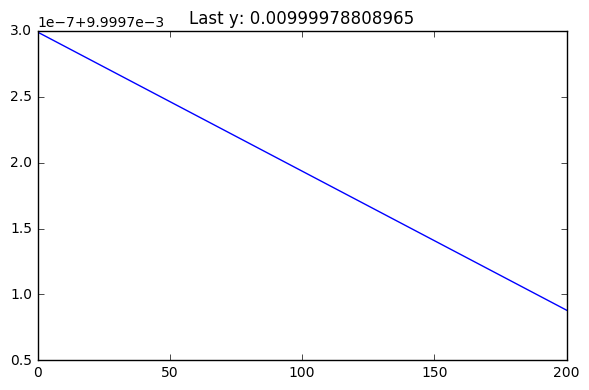

In [63]:
#list_es[0]
#list_pos2[:,1]
plt.plot(list_pos2[:,1])
plt.title('Last y: '+str(list_pos2[:,1][-1]))
plt.tight_layout()
plt.show()